# Data preparation, analysis and prediction on Titanic Dataset 

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Data

In [2]:
titanic_df = pd.read_csv('titanic.csv')

In [32]:
titanic_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.00,S,No
586,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.00,S,Yes
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.00,S,Yes
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.15,S,No
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,30.0,0,0,239853,0.00,S,Yes


## Data Cleaning and Preparation

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
sns.set_style('darkgrid')

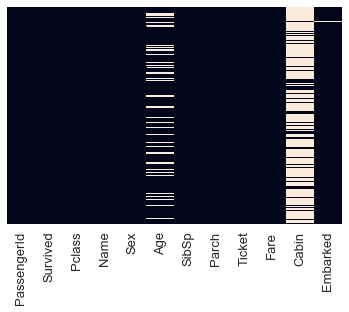

In [6]:
sns.set(font_scale=1.3)
sns.heatmap(titanic_df.isnull(), cbar=False, yticklabels=False)

In [7]:
titanic_df.drop('Cabin', axis=1, inplace=True)

In [8]:
titanic_df = titanic_df.dropna(subset = ['Embarked'])

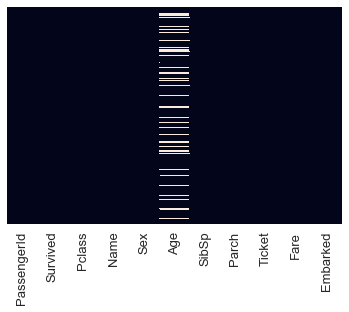

In [9]:
sns.set(font_scale=1.3)
sns.heatmap(titanic_df.isnull(), cbar=False, yticklabels=False)

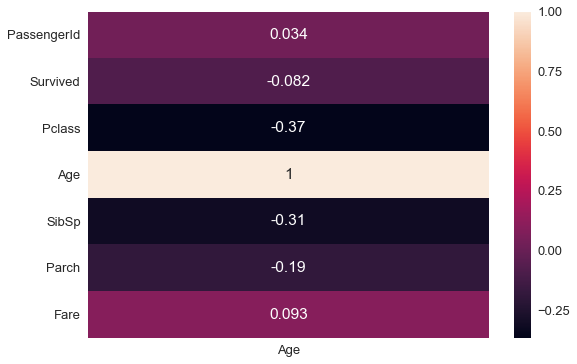

In [10]:
corr_age = pd.DataFrame(titanic_df.corr()['Age'], index=titanic_df.columns)
plt.figure(figsize=(9, 6))
sns.set(font_scale=1.3)
sns.heatmap(corr_age.dropna(), annot=True)

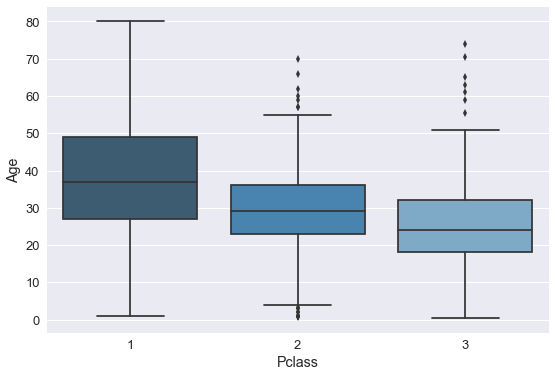

In [11]:
plt.figure(figsize=(9,6))
sns.boxplot(x='Pclass', y='Age', data=titanic_df, palette='Blues_d')

In [12]:
pclass = pd.DataFrame()
pclass['Count'] = titanic_df['Pclass'].value_counts()
pclass['Mean of Age'] = titanic_df.groupby('Pclass').mean()['Age']
pclass

,Count,Mean of Age
3,491,25.140620
1,214,38.105543
2,184,29.877630


In [13]:
def impute_age(column):   
    
    Age = column[0]
    Pclass = column[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:           
            return 38
        
        elif Pclass ==2:                   
            return 30
        
        else:
            return 25
        
    else:
        return Age

In [14]:
titanic_df['Age'] = titanic_df[['Age', 'Pclass']].apply(impute_age, axis=1) 

In [15]:
pclass['Mean of Age after Imputed'] = titanic_df.groupby('Pclass').mean()['Age']
pclass

,Count,Mean of Age,Mean of Age after Imputed
3,491,25.140620,25.101670
1,214,38.105543,38.090748
2,184,29.877630,29.884946


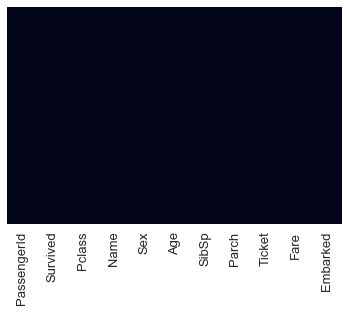

In [16]:
sns.set(font_scale=1.3)
sns.heatmap(titanic_df.isnull(), cbar=False, yticklabels=False)

# Data Analysis and Visualization

In [17]:
titanic_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
276,277,0,3,"Lindblom, Miss. Augusta Charlotta",female,45.0,0,0,347073,7.75,S
363,364,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.05,S
188,189,0,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.50,Q
80,81,0,3,"Waelens, Mr. Achille",male,22.0,0,0,345767,9.00,S
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.00,S


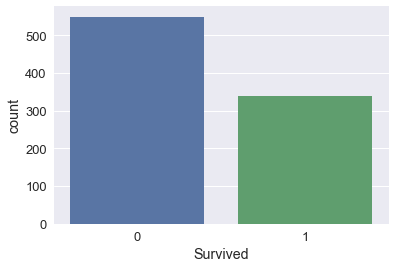

In [19]:
sns.countplot('Survived', data=titanic_df)

In [20]:
surv = pd.DataFrame()
surv['Count'] = titanic_df['Survived'].value_counts()
surv

,Count
0,549
1,340


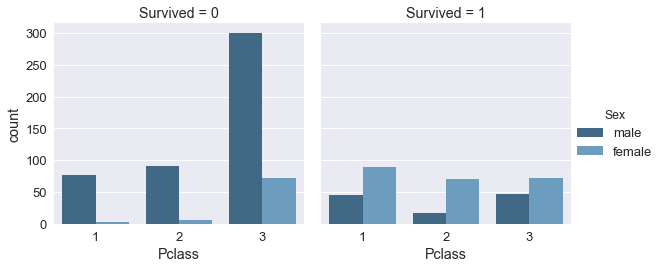

In [21]:
sns.factorplot(x='Pclass', col='Survived', hue='Sex', kind='count', data=titanic_df, palette='Blues_d')

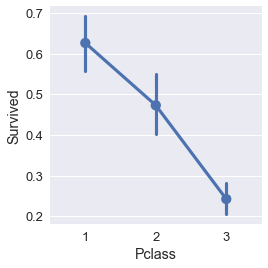

In [22]:
sns.factorplot('Pclass','Survived',data=titanic_df)

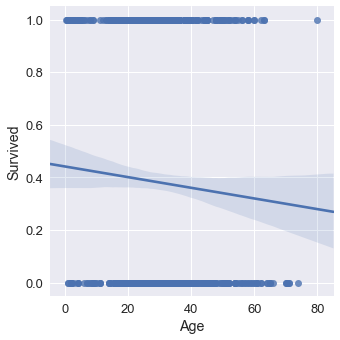

In [23]:
sns.lmplot('Age','Survived',data=titanic_df)

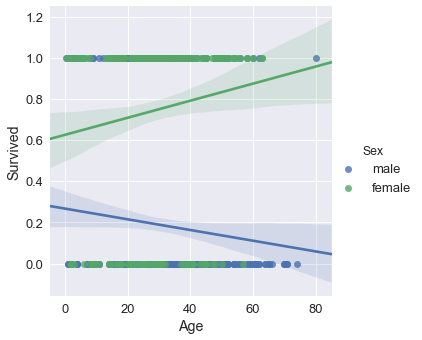

In [24]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_df)

In [25]:
titanic_df['Alone'] = titanic_df['SibSp'] + titanic_df['Parch']

In [31]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Yes


In [28]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = 'No'

titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Yes'

C:\Users\Administrator\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,No
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,No
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Yes


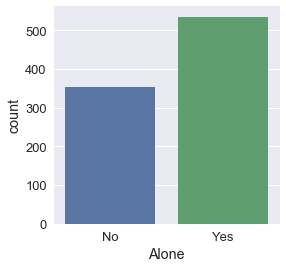

In [33]:
sns.factorplot('Alone',data=titanic_df,kind='count')

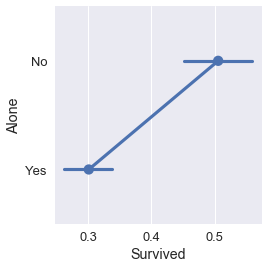

In [34]:
sns.factorplot('Survived','Alone',data=titanic_df)

# Building a Prediction model using Logistic Regression

In [25]:
sex_dm = pd.get_dummies(titanic_df.Sex, drop_first=True)
embarked_dm = pd.get_dummies(titanic_df.Embarked, drop_first=True)

In [26]:
titanic_df.drop(['Name', 'Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [27]:
titanic_df = pd.concat([titanic_df, sex_dm, embarked_dm], axis=1)
titanic_df.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X = titanic_df.drop('Survived', axis=1)
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
pred = logmodel.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(confusion_matrix(y_test,pred))

[[152  17]
 [ 33  65]]


In [35]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.82      0.90      0.86       169
          1       0.79      0.66      0.72        98

avg / total       0.81      0.81      0.81       267

